<a href="https://colab.research.google.com/github/SamikshKodgire/AAI530_IntelligentWaterManagementInAgriculture/blob/main/Project_AAI530_Sam_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports & Setup

In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Load ZIP & Extract Files

In [2]:
import zipfile
from pathlib import Path

ZIP_PATH = "/content/archive.zip"
EXTRACT_PATH = "/content/iot_data"

with zipfile.ZipFile(ZIP_PATH, 'r') as z:
    z.extractall(EXTRACT_PATH)

daily_path = Path(EXTRACT_PATH) / "Daily"
hourly_path = Path(EXTRACT_PATH) / "Hourly"

len(list(daily_path.glob("*.txt"))), len(list(hourly_path.glob("*.txt")))


(42, 42)

# Helper Function to Load Multiple Sensor Files

In [3]:
def load_sensor_folder(folder_path):
    dfs = []
    for file in folder_path.glob("*.txt"):
        df = pd.read_csv(file, sep="\t", na_values=["NA"])
        df["sensor_id"] = file.stem
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)


# Load Daily & Hourly Data

In [4]:
daily_df = load_sensor_folder(daily_path)
hourly_df = load_sensor_folder(hourly_path)

daily_df.shape, hourly_df.shape

((140532, 13), (3373658, 14))

# Initial Inspection  for "daily" dataset(Exploratory Data Analysis)

In [5]:
daily_df.head()

,Location,Date,VW_30cm,VW_60cm,VW_90cm,VW_120cm,VW_150cm,T_30cm,T_60cm,T_90cm,T_120cm,T_150cm,sensor_id
0,CAF019,04/20/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAF019
1,CAF019,04/21/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAF019
2,CAF019,04/22/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAF019
3,CAF019,04/23/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAF019
4,CAF019,04/24/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAF019


In [6]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140532 entries, 0 to 140531
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Location   140532 non-null  object 
 1   Date       140532 non-null  object 
 2   VW_30cm    77571 non-null   float64
 3   VW_60cm    75188 non-null   float64
 4   VW_90cm    75525 non-null   float64
 5   VW_120cm   75785 non-null   float64
 6   VW_150cm   74521 non-null   float64
 7   T_30cm     77954 non-null   float64
 8   T_60cm     76662 non-null   float64
 9   T_90cm     76750 non-null   float64
 10  T_120cm    76556 non-null   float64
 11  T_150cm    73403 non-null   float64
 12  sensor_id  140532 non-null  object 
dtypes: float64(10), object(3)
memory usage: 13.9+ MB


In [7]:
daily_df.describe()

,VW_30cm,VW_60cm,VW_90cm,VW_120cm,VW_150cm,T_30cm,T_60cm,T_90cm,T_120cm,T_150cm
count,77571.000000,75188.000000,75525.000000,75785.000000,74521.000000,77954.000000,76662.000000,76750.000000,76556.000000,73403.000000
mean,0.260126,0.289954,0.307258,0.322754,0.336948,10.213664,10.073274,9.880756,9.819789,9.834604
std,0.074672,0.091789,0.097295,0.095094,0.094815,6.722506,5.442773,4.631085,3.972600,3.489384
min,0.078000,0.091000,0.063000,0.094000,0.080000,-9.100000,0.660000,1.840000,1.100000,0.670000
25%,0.206000,0.212000,0.228000,0.244000,0.263000,3.760000,4.900000,5.500000,6.117000,6.700000
50%,0.248000,0.288000,0.305000,0.318000,0.337000,9.640000,9.810000,9.550000,9.520000,9.550000
75%,0.311000,0.350000,0.390000,0.396000,0.403000,16.450000,15.030000,14.030000,13.300000,12.730000
max,0.688000,0.650000,0.605000,0.631000,0.614000,28.190000,23.320000,21.050000,24.160000,25.050000


# Initial Inspection for "hourly" dataset(Exploratory Data Analysis)

In [8]:
hourly_df.head()

,Location,Date,Time,VW_30cm,VW_60cm,VW_90cm,VW_120cm,VW_150cm,T_30cm,T_60cm,T_90cm,T_120cm,T_150cm,sensor_id
0,CAF019,04/20/2007,0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAF019
1,CAF019,04/20/2007,1:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAF019
2,CAF019,04/20/2007,2:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAF019
3,CAF019,04/20/2007,3:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAF019
4,CAF019,04/20/2007,4:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAF019


In [9]:
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373658 entries, 0 to 3373657
Data columns (total 14 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Location   object 
 1   Date       object 
 2   Time       object 
 3   VW_30cm    float64
 4   VW_60cm    float64
 5   VW_90cm    float64
 6   VW_120cm   float64
 7   VW_150cm   float64
 8   T_30cm     float64
 9   T_60cm     float64
 10  T_90cm     float64
 11  T_120cm    float64
 12  T_150cm    float64
 13  sensor_id  object 
dtypes: float64(10), object(4)
memory usage: 360.3+ MB


In [10]:
hourly_df.describe()

,VW_30cm,VW_60cm,VW_90cm,VW_120cm,VW_150cm,T_30cm,T_60cm,T_90cm,T_120cm,T_150cm
count,1.842278e+06,1.804019e+06,1.794358e+06,1.801775e+06,1.777121e+06,1.851682e+06,1.823682e+06,1.824201e+06,1.820807e+06,1.749873e+06
mean,2.600616e-01,2.877150e-01,3.069975e-01,3.224684e-01,3.373996e-01,1.018456e+01,1.005767e+01,9.865010e+00,9.810708e+00,9.826359e+00
std,7.473074e-02,9.415593e-02,9.730937e-02,9.506329e-02,9.564811e-02,6.736659e+00,5.448619e+00,4.634687e+00,3.975569e+00,3.489910e+00
min,7.700000e-02,4.000000e-03,6.100000e-02,9.300000e-02,7.400000e-02,-9.100000e+00,-7.000000e+00,-7.100000e+00,-2.800000e+00,6.000000e-01
25%,2.060000e-01,2.100000e-01,2.280000e-01,2.440000e-01,2.630000e-01,3.700000e+00,4.900000e+00,5.500000e+00,6.100000e+00,6.700000e+00
50%,2.480000e-01,2.860000e-01,3.040000e-01,3.170000e-01,3.370000e-01,9.500000e+00,9.800000e+00,9.500000e+00,9.500000e+00,9.500000e+00
75%,3.110000e-01,3.490000e-01,3.900000e-01,3.960000e-01,4.040000e-01,1.640000e+01,1.500000e+01,1.400000e+01,1.330000e+01,1.270000e+01
max,1.010000e+00,6.520000e-01,6.090000e-01,6.310000e-01,6.140000e-01,2.900000e+01,2.340000e+01,2.110000e+01,2.480000e+01,2.530000e+01


# Data Cleaning

Convert Date → Datetime

In [11]:
daily_df["Date"] = pd.to_datetime(daily_df["Date"])
hourly_df["Date"] = pd.to_datetime(hourly_df["Date"])

Drop Columns with Excessive Missing Data (>50%)

In [12]:
def drop_sparse_columns(df, threshold=0.5):
    return df.loc[:, df.isnull().mean() < threshold]

daily_df = drop_sparse_columns(daily_df)
hourly_df = drop_sparse_columns(hourly_df)

Missing Value Imputation (Time-Series Aware)

In [15]:
import warnings

warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    message=".*DataFrame.interpolate with object dtype.*"
)

Imputation for daily time logg

In [16]:
# Ensure Date is datetime
daily_df["Date"] = pd.to_datetime(daily_df["Date"])

# Sort properly
daily_df = daily_df.sort_values(["sensor_id", "Date"])

# Apply time-based interpolation per sensor
daily_df = (
    daily_df
    .groupby("sensor_id", group_keys=False)
    .apply(
        lambda x: x
        .set_index("Date")
        .infer_objects(copy=False)              # Fix FutureWarning
        .interpolate(method="time")             # Time-aware interpolation
        .reset_index()
    )
)


/tmp/ipython-input-2956372821.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Imputation for hourly time logg


In [19]:
# 1. Ensure Date is datetime and coerce invalid values to NaT
hourly_df["Date"] = pd.to_datetime(hourly_df["Date"], errors="coerce")

# 2. Drop rows with missing timestamps (required for time-based interpolation)
hourly_df = hourly_df.dropna(subset=["Date"])

# 3. Sort by sensor and time
hourly_df = hourly_df.sort_values(["sensor_id", "Date"])

# 4. Time-aware interpolation per sensor
hourly_df = (
    hourly_df
    .groupby("sensor_id", group_keys=False)
    .apply(
        lambda x: (
            x.set_index("Date")
             .infer_objects(copy=False)                  # Avoid FutureWarning
             .interpolate(method="time", limit_direction="both")
             .reset_index()
        )
    )
)

# 5. Reset final index
hourly_df = hourly_df.reset_index(drop=True)


/tmp/ipython-input-843009127.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Exploratory Visualizations

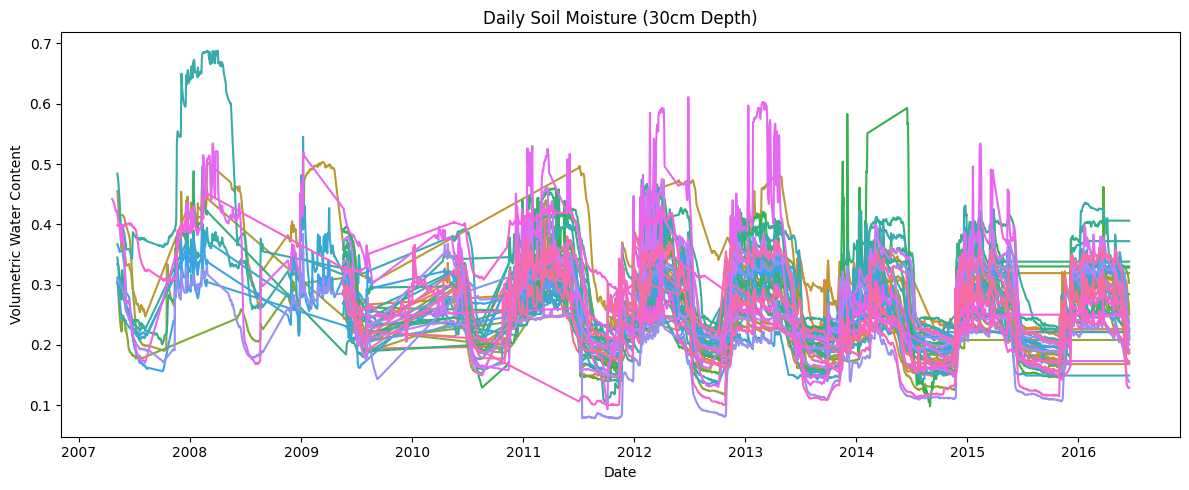

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Date is datetime
daily_df["Date"] = pd.to_datetime(daily_df["Date"])

# Aggregate duplicate timestamps per sensor
daily_plot_df = (
    daily_df
    .groupby(["sensor_id", "Date"], as_index=False)
    .mean(numeric_only=True)
)

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=daily_plot_df,
    x="Date",
    y="VW_30cm",
    hue="sensor_id",
    legend=False
)
plt.title("Daily Soil Moisture (30cm Depth)")
plt.xlabel("Date")
plt.ylabel("Volumetric Water Content")
plt.tight_layout()
plt.show()


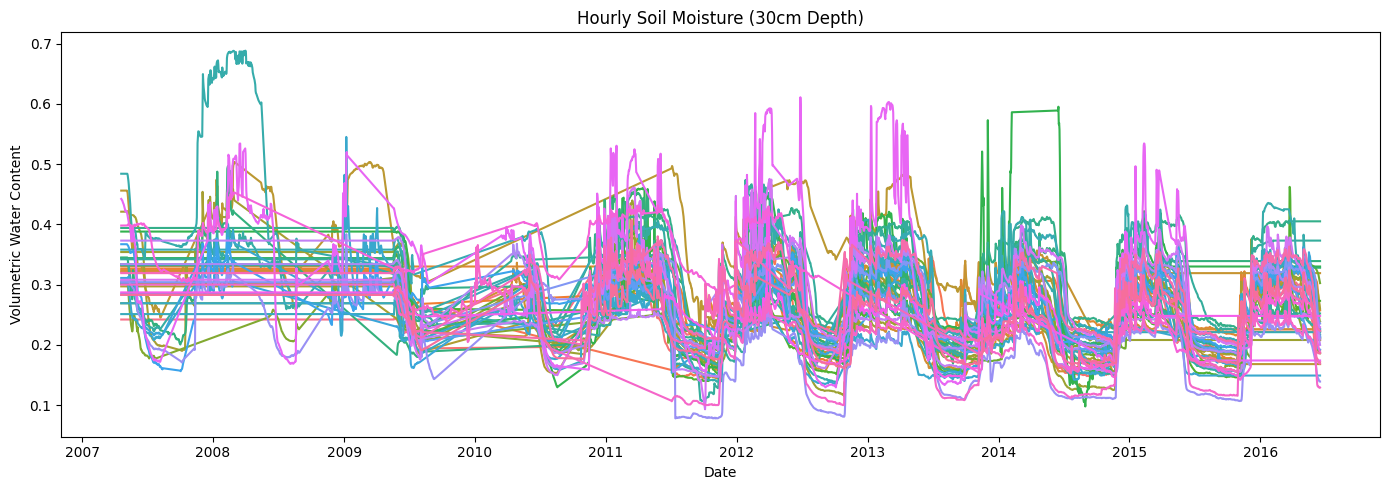

In [22]:
# Ensure Date is datetime
hourly_df["Date"] = pd.to_datetime(hourly_df["Date"])

# Aggregate duplicate timestamps per sensor
hourly_plot_df = (
    hourly_df
    .groupby(["sensor_id", "Date"], as_index=False)
    .mean(numeric_only=True)
)

# Plot
plt.figure(figsize=(14, 5))
sns.lineplot(
    data=hourly_plot_df,
    x="Date",
    y="VW_30cm",
    hue="sensor_id",
    legend=False
)
plt.title("Hourly Soil Moisture (30cm Depth)")
plt.xlabel("Date")
plt.ylabel("Volumetric Water Content")
plt.tight_layout()
plt.show()


These plots are unreadable

We currently have:
  

1.   Many sensors
2.   10+ years of data
3.   Overlapping lines
4.   No aggregation or focus window


  
  


Result:
  “Spaghetti plot”
  No pattern recognition
  No insight for an evaluator